<a href="https://colab.research.google.com/github/bamboohorseking/INDE577/blob/main/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Trees, Decision Boundaries, and Evaluation
###Definition:
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is a type of non-parametric supervised learning that can be used for both regression and classfication. 
And the algorithm can be visualized by the following figure:
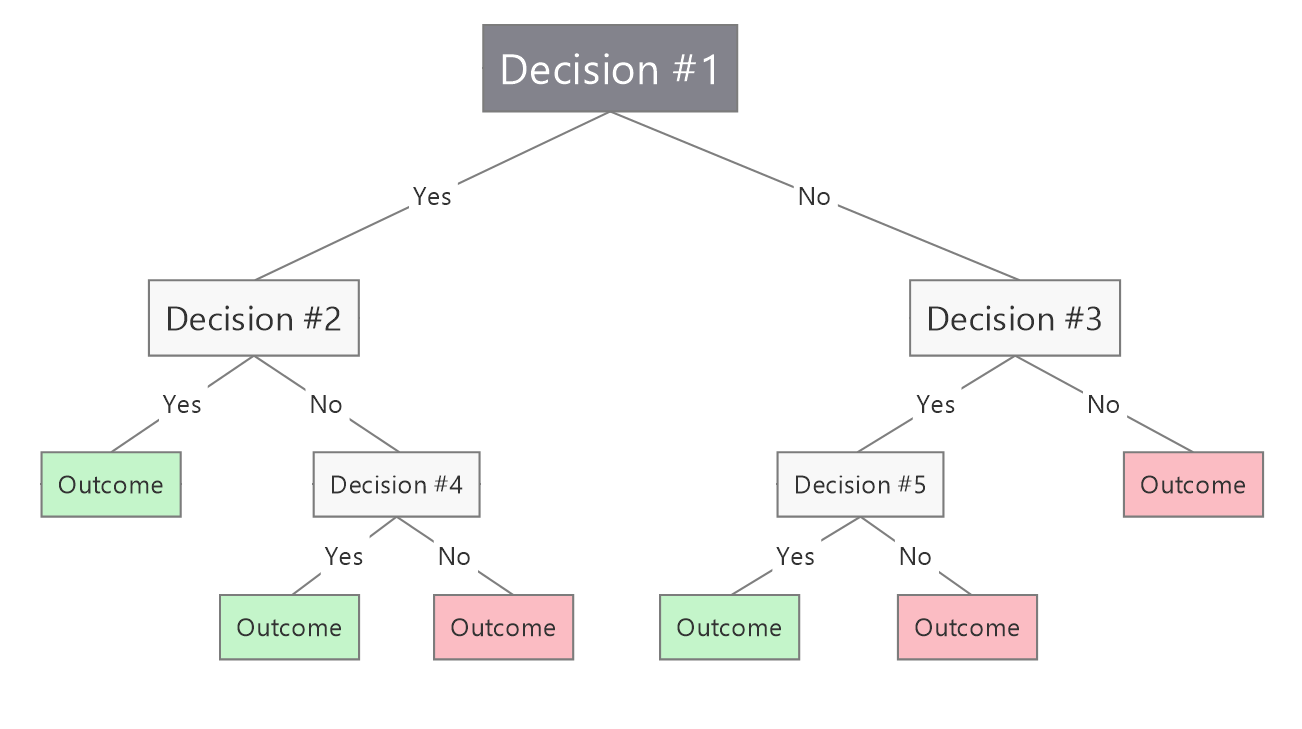


The Goal of Decision Tree is: Create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.\
As shown in the figure above, the decision tree contains: Root Node, Decision Node and Leaf Node. Root Node is It is the node present at the beginning of a decision tree from where the whole dataset begins to be splitted. Decision Node is the nodes we get after splitting the root nodes.  Leaf Node is also a kind of decision node but it is impossible to get further splitting. Leaf Node aslo has two kinds: pure node and impure node, and pure node only conatins samples of the same class. We want all Leaf node to be pure, but it is impossible to achieve that goal if we have a large dataset, so we can tolerate some impurities in those leaf nodes. 
There are 2 factors that can help us measure the impurity of a node:
1.   Entropy = $\sum_{i =1}^c - p_ilog_2(p_i)$
2.   Gini = $1-\sum_{i =1}^c p_i^2$

In here, c is the total number of classes, $p_i$ is the probability of class i in the node.\
In the example of the above figure, we start from the decision #1 which is also the root node of the whole decision tree. We choose a condition to split it to decision #2 and decision #3. For this process, the information gain(IG) = I(decision #1) - ($w_2$I(decision #2) + $w_3$I(decision #3)), in which $w_2 = \frac{\mid decision \#2\mid}{\mid decision \#1\mid}$, $w_3 = \frac{\mid decision \#3\mid}{\mid decision \#1\mid}$


In this assignment, we will explore classification decision trees on adataset named "Diabetes". It contains 768 samples,9 columns. This data mainly consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.\
The website link to download: https://www.kaggle.com/uciml/pima-indians-diabetes-database. \
The following packages will be needed to run the code below:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

First, we need to preprocess the whole dataset to make sure the data is readable and easy to use. In this assignment, I will only use factor 'Glucose' and 'BloodPressure' to determine if the patient has diabetes or not. 

In [2]:
col_names = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
diabetes = pd.read_csv("diabetes.csv")

In [3]:
cols = ['Glucose', "BloodPressure", "Outcome"]
diabetes = diabetes[cols]

In [5]:
X_col = ['Glucose', "BloodPressure"]
X = pd.DataFrame(diabetes[X_col])
y = diabetes["Outcome"]

First, we need to take a look at the distribution of dataset, blue means not having diabetes, red represents having diabetes. From the plot, we can notice that there is no linear boundary between blue dots and red dots, so it is hard to classify it by using a linear regression method. 

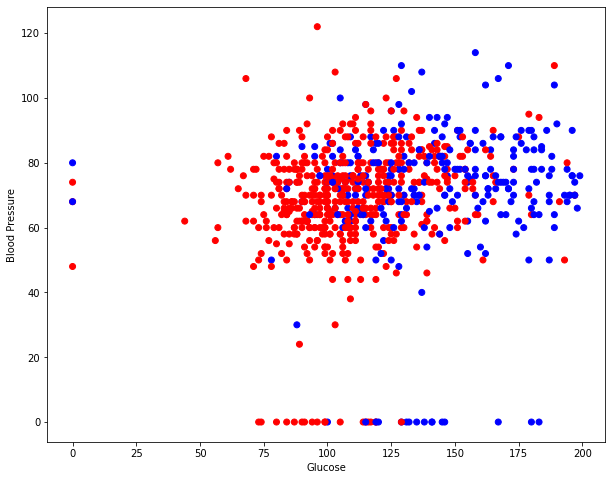

In [6]:
colors = ["red" if Outcome == 0 else "blue" for Outcome in y]
plt.figure(figsize = (10,8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = colors)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.show()

By using the train_test_split function in sklearn library, we can split the whole data into training set and test set by the ratio of 4:1. 

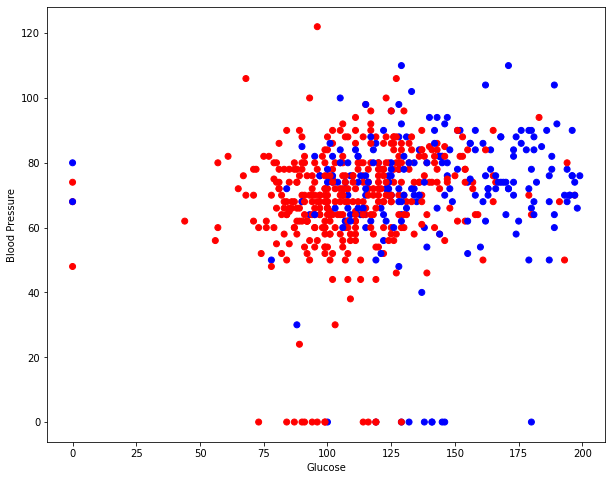

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
c_train = ["red" if Outcome == 0 else "blue" for Outcome in y_train]
c_test = ["red" if Outcome == 0 else "blue" for Outcome in y_test]
plt.figure(figsize = (10,8))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = c_train)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.show()

Set the features name and color labels. 

In [8]:
features = ["Glucose", "Blood Pressure"]
labels = ["red", "blue"]

By using the DecisionTreeClassifier from sklearn, we can easily fit the decision tree model of our dataset. In order to avoid overfitting, I set the max_depth = 4 to simplify the whole model. 

In [9]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

By using tree function from  sklearn, we are able to visualize the decision tree model for our dataset, and it can also shows us the decision and gini value of each node.

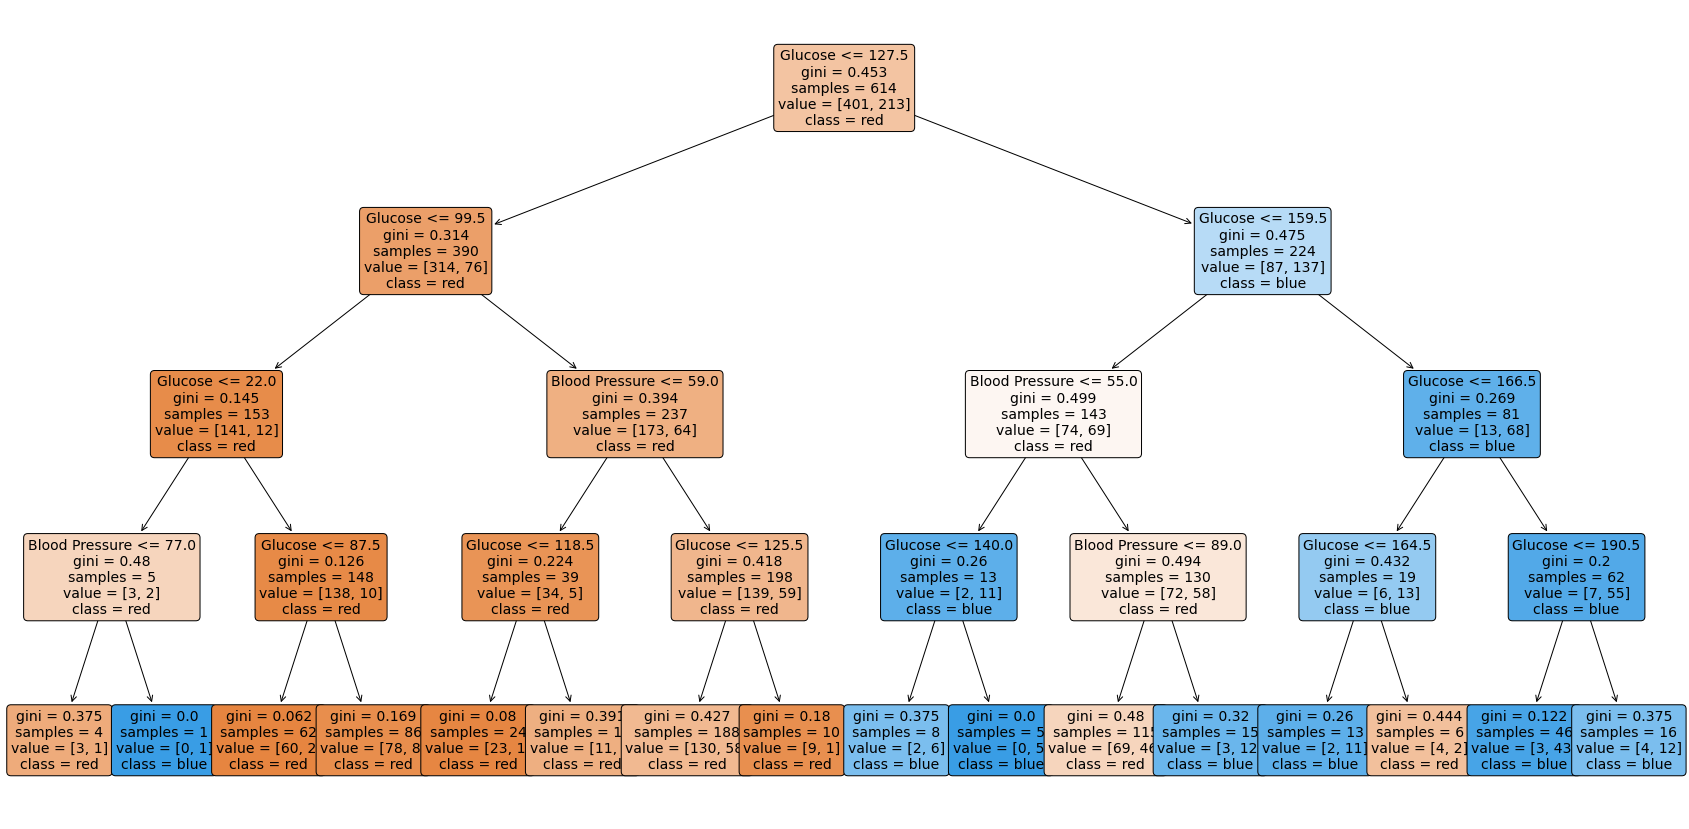

In [10]:
from sklearn import tree

plt.figure(figsize = (30,15))
a = tree.plot_tree(decision_tree, feature_names = features,
             class_names = labels, 
             rounded = True,
             filled = True, 
             fontsize = 14)
plt.show()

In [11]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree, feature_names = features)

print(tree_rules)

|--- Glucose <= 127.50
|   |--- Glucose <= 99.50
|   |   |--- Glucose <= 22.00
|   |   |   |--- Blood Pressure <= 77.00
|   |   |   |   |--- class: 0
|   |   |   |--- Blood Pressure >  77.00
|   |   |   |   |--- class: 1
|   |   |--- Glucose >  22.00
|   |   |   |--- Glucose <= 87.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  87.50
|   |   |   |   |--- class: 0
|   |--- Glucose >  99.50
|   |   |--- Blood Pressure <= 59.00
|   |   |   |--- Glucose <= 118.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  118.50
|   |   |   |   |--- class: 0
|   |   |--- Blood Pressure >  59.00
|   |   |   |--- Glucose <= 125.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  125.50
|   |   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- Glucose <= 159.50
|   |   |--- Blood Pressure <= 55.00
|   |   |   |--- Glucose <= 140.00
|   |   |   |   |--- class: 1
|   |   |   |--- Glucose >  140.00
|   |   |   |   |--- class: 1
|   |   |--- Blood Pressure >  55.00
|   |  

And we can also plot the result of our decision tree model.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


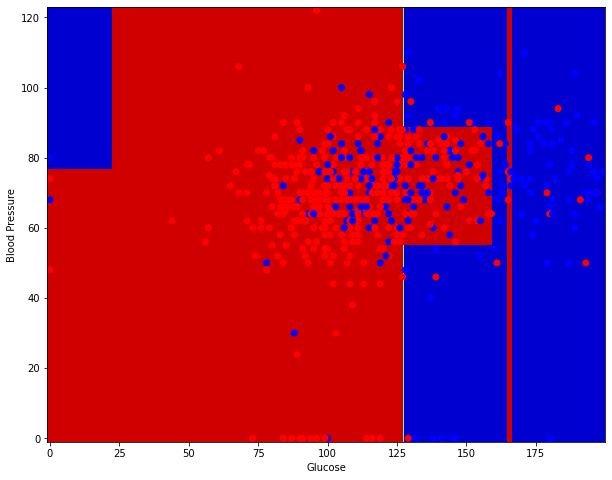

In [12]:
#Set a plot_step
plot_step = 0.02

plt.figure(figsize = (10, 8))

x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() +1
y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = "jet_r")

plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = c_train)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.show()

## The Confusion Matrix
In many instances, we are interested in the following: 
* true positive -> predicted true and actually true
* false positive -> predicted true and actually  not true
* false negative -> predicted false and actually true
* true negatives -> predicted false and actually false

All of these possibilities are contained in the confusion matrix.\
Confusion matrix can describe the performance of a classification model, it is more straightforward.

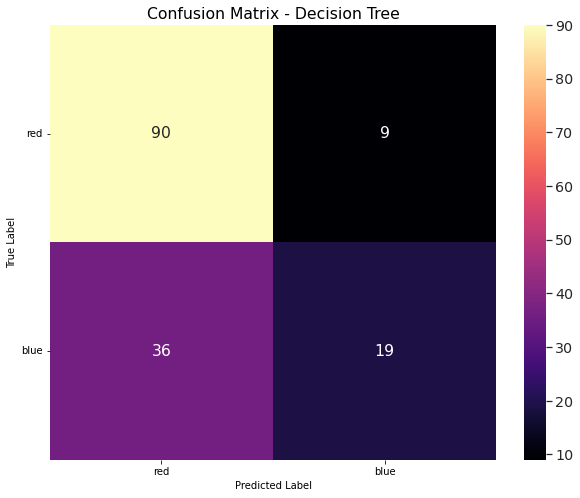

In [13]:
#predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

#Import metrices from sklearn 
from sklearn import metrics

#Notes: visulizing your tree above will be weird after running seaborn
import seaborn as sns

#The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

#COnvert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize = (10,8))
ax = plt.axes()
sns.set(font_scale = 1.3)
sns.heatmap(matrix_df,
           annot = True, 
           fmt = "g",
           ax = ax,
           cmap = "magma")
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize = 10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 10)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

We can also plot the decision region for test set. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


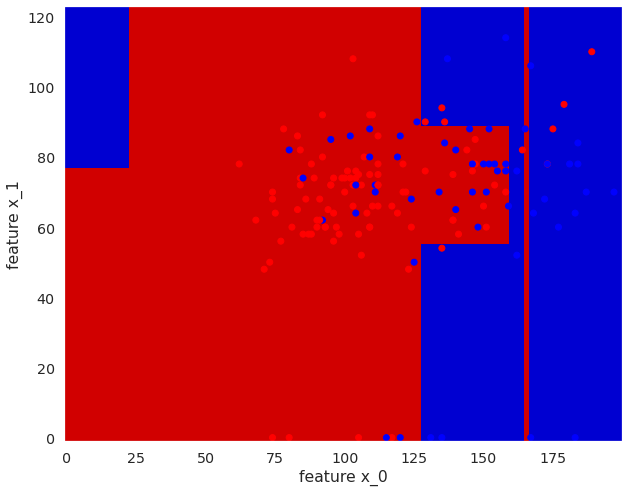

In [16]:
#Set a plot_step
plot_step = 0.02

plt.figure(figsize = (10, 8))

x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() +1
y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = "jet_r")

plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = c_test)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

We can also calculate the precision value for the prediction result of test set. 

In [17]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree, 
                                   average = None)

precision_results = pd.DataFrame(precision, index  = labels)
precision_results.rename(columns = {0:"precision"}, inplace = True)
precision_results

precision score


,precision
red,0.714286
blue,0.678571


In [18]:
#Recall and teh f1-score

print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        99
           1       0.68      0.35      0.46        55

    accuracy                           0.71       154
   macro avg       0.70      0.63      0.63       154
weighted avg       0.70      0.71      0.68       154

